In [2]:
import numpy
import math
def makeRFSFilters():
    SUP = 49
    SCALES = [1,2,4]
    NORIENT = 6
    
    NROTINV = 2
    NBAR = len(SCALES) * NORIENT 
    NEDGE = len(SCALES) * NORIENT
    NF = NEDGE + NBAR + NROTINV
    F = numpy.zeros((NF, SUP, SUP))
    hsup = 24
    nownum = 0
    x = []
    y = []
    for i in range(-hsup, hsup+1):
        for j in range(-hsup, hsup+1):
            x.append(j)
            y.append(i)
            nownum += 1
    orgpts = numpy.zeros((2, SUP*SUP))
    for i in range(SUP*SUP):
        orgpts[0][i] = x[i]
        orgpts[1][i] = y[i]
    
    count = 0
    for scale in range(len(SCALES)):
        for orient in range(NORIENT):
            angle = math.pi * orient / NORIENT
            Turn = numpy.zeros((2, 2))
            c = math.cos(angle)
            s = math.sin(angle)
            Turn[1, 1] = c
            Turn[0, 0] = c
            Turn[0, 1] = -s
            Turn[1, 0] = s
            Turn = numpy.mat(Turn)
            orgpts = numpy.mat(orgpts)
            rotpts = Turn * orgpts
            #print('r')
            #print(rotpts)
            F[count, :, :] = makefilter(SCALES[scale], 0, 1, rotpts, SUP)
            F[count+NEDGE, :, :] = makefilter(SCALES[scale], 0, 2, rotpts, SUP)
            count = count + 1
            
    F[NBAR+NEDGE, :, :] = normalize(imgGaussian(hsup, 10))
    F[NBAR+NEDGE+1, :, :] = normalize(imgLaplacian(hsup, 10))
    return F

def makefilter(scale, phasex, phasey, pts, sup):
    gx = gaussld(3*scale, 0, pts[0, :], phasex)
    gy = gaussld(1*scale, 0, pts[1, :], phasey)
    f = normalize(numpy.multiply(gx, gy).reshape(sup, sup))
    return f

def gaussld(sigma, mean, x, ord):
    #print('x')
    #print(x)
    x = x - mean
    x = numpy.mat(x)
    num = numpy.multiply(x, x)
    #print('x2')
    #print(x)
    #print(type(num))
    variance = sigma ** 2
    denom = 2 * variance
    #print(denom)
    g = numpy.exp(-1.0*num / denom) / numpy.sqrt(numpy.pi * denom)
    #print('g')
    #print(g)
    if ord == 1:
        g = numpy.multiply(g, x/variance)
    elif ord == 2:
        g = numpy.multiply(g, (num - variance) / (variance**2))
    return g
    
def normalize(f):
    f = f - f.mean()
    f = f / abs(f).sum()
    return f

In [3]:
def imgGaussian(size, sigma):
    '''
    :param sigma: σ标准差
    :return: 高斯滤波器的模板
    '''
    img_h = img_w = size*2+1
    gaussian_mat = numpy.zeros((img_h, img_w))
    for x in range(-size, size + 1):
        for y in range(-size,size + 1):
            gaussian_mat[x + size][y + size] = numpy.exp(-0.5 * (x ** 2 + y ** 2) / (sigma ** 2))
    return gaussian_mat

def imgLaplacian(size, sigma):
    laplacian_mat = -imgGaussian(size, 10)
    laplacian_mat[size+1, size+1] = -(laplacian_mat.sum() - laplacian_mat[size+1, size+1])
    return laplacian_mat

In [4]:
F = makeRFSFilters()

In [5]:
F.shape

(38, 49, 49)

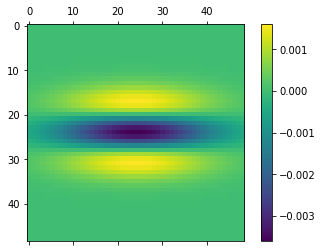

In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(F[30, : ,:])
fig.colorbar(cax)
plt.show()

In [10]:
len(F)

38